#### Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.




### Importing Skin Cancer Data


##### Importing required libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## Using the data by mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')

# Defining the path for train and test images
root_path ='/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration'
data_dir_train = pathlib.Path(root_path+"/Train")
data_dir_test = pathlib.Path(root_path+"/Test")

 - The uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Checking number of images in the train and test set
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Number of images in the train set",image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Number of images in the test set",image_count_test)

Number of images in the train set 2239
Number of images in the test set 118


In [4]:
#Total number of skin imageswe have 
image_count_train+image_count_test 

2357

### Load the images using keras.preprocessing



### Create a dataset

###### Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## train dataset

train_ds =tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir_train,image_size=(180,180),seed=123,batch_size=32,subset='training',validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
##  validation dataset

val_ds =tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir_train,image_size=(180,180),seed=123,batch_size=32,subset='validation',validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# The different classes of skin cancer  are
train_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [9]:
# The different classes of skin cancer  are

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [10]:
#list directory in train folder
dir_train = os.listdir(data_dir_train)
dir_train.sort()
dir_train

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

### Data Visualization
#### Visualizing one instance of all the nine classes present in the dataset

In [11]:
import glob
import matplotlib.image as mpimg

file_path = []
class_name = []

#get one file path from each folder
for dir_name in dir_train:
    path = str(data_dir_train) +"/"+ dir_name
    #print(path)
    for file_name in glob.iglob(path+'/*.jpg', recursive=True):
        file_path.append(file_name)
        class_name.append(dir_name)
        break


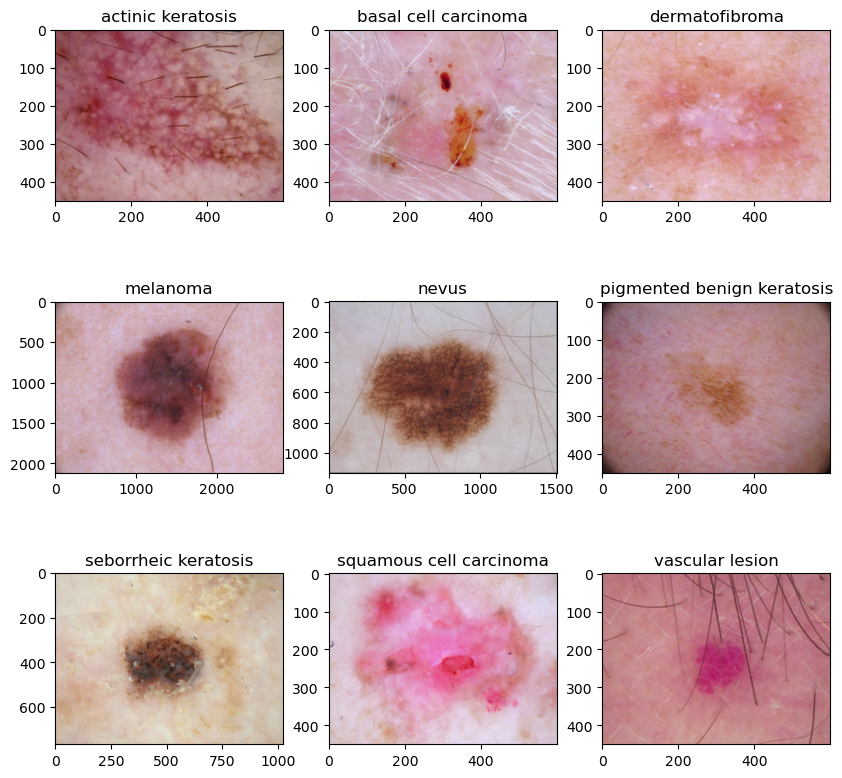

In [12]:
#display one image from each folder
plt.figure(figsize=(10,10))
for i in range(len(class_names)):
    ax = plt.subplot(3,3,i+1)
    img = mpimg.imread(file_path[i])
    plt.imshow(img)
    plt.title(class_names[i])

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
print(AUTOTUNE)
train_ds.prefetch(buffer_size=AUTOTUNE)
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

-1


### Model creation
#### Creating a CNN model, which can accurately detect 9 classes present in the dataset.
#### Using layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). 

In [14]:
model = model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names),activation='softmax')
])

### Compile the model
#### Using adam optimizer and Sparse Categorical Crossentropy loss.

In [15]:

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [16]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [17]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 28s 404ms/step - loss: 1.9565 - accuracy: 0.2667 - val_loss: 1.7592 - val_accuracy: 0.3803
Epoch 2/20
56/56 [==============================] - 17s 296ms/step - loss: 1.6415 - accuracy: 0.4062 - val_loss: 1.5438 - val_accuracy: 0.4765
Epoch 3/20
56/56 [==============================] - 17s 298ms/step - loss: 1.4871 - accuracy: 0.4827 - val_loss: 1.5173 - val_accuracy: 0.4810
Epoch 4/20
56/56 [==============================] - 17s 301ms/step - loss: 1.3387 - accuracy: 0.5173 - val_loss: 1.4651 - val_accuracy: 0.4989
Epoch 5/20
56/56 [==============================] - 17s 299ms/step - loss: 1.2297 - accuracy: 0.5787 - val_loss: 1.5031 - val_accuracy: 0.4966
Epoch 6/20
56/56 [==============================] - 17s 297ms/step - loss: 1.1398 - accuracy: 0.5871 - val_loss: 1.3383 - val_accuracy: 0.5481
Epoch 7/20
56/56 [==============================] - 17s 305ms/step - loss: 1.0490 - accuracy: 0.6317 - val_loss: 1.4411 - val_accuracy: 0.5168

In [18]:
# Checking number of model parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Visualizing training results

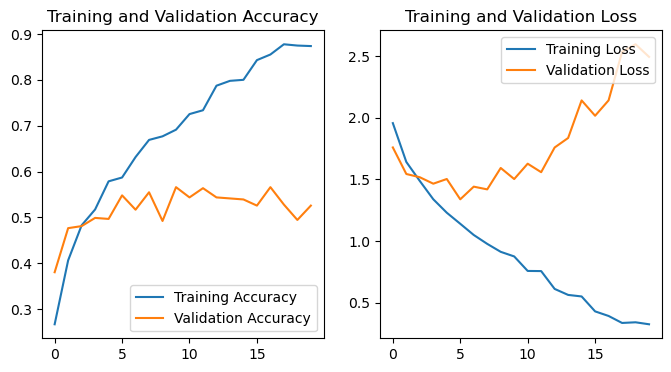

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Inference: 
 

 -  As we can see from the plots, training accuracy and validation accuracy differ by large margin.
 - The model has achieved only around 59% accuracy on the validation set but the training accuracy is around 94%.
 - In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy is only around 59% in the training process. 
 - This difference is a clear indicator of overfitting


##### Data Augmentation: Training with more data can reduce overfitting. 
##### Data Augmentation is a technique often used by Data Scientists to increase the size of an existing dataset by applying image transformations like flipping, cropping, zooming, etc., when the available dataset is small, lacks diversity, and acquiring new data could be expensive and time-consuming.

In [20]:
# The skin images can be taken from different angles to capture the cancer type. 
# Therefore we use flipping, rotation and zooming for the data augmentation.

data_augment = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.1, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(-0.1, 0.1), width_factor=(-0.1, 0.1), fill_mode='reflect')
])

image before augmentation
image after augmentation


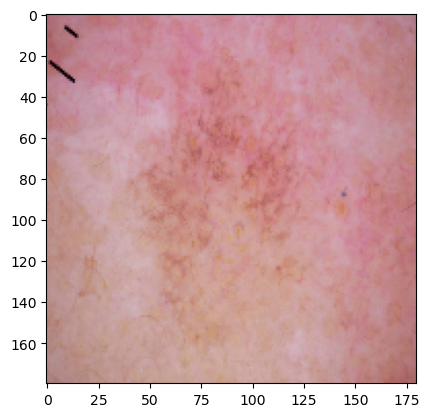

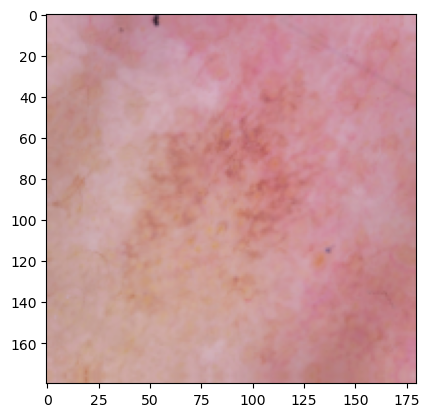

In [21]:
# Visualize how your augmentation strategy works for one instance of training image.
for images, t in train_ds.take(1):
    augmented_images = data_augment(images)
    print("image before augmentation")
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.figure()
    print("image after augmentation")
    plt.imshow(augmented_images[0].numpy().astype("uint8"))

    #plt.imshow(augmented_images[1].numpy().astype("uint8"))


image before augmentation
image after augmentation


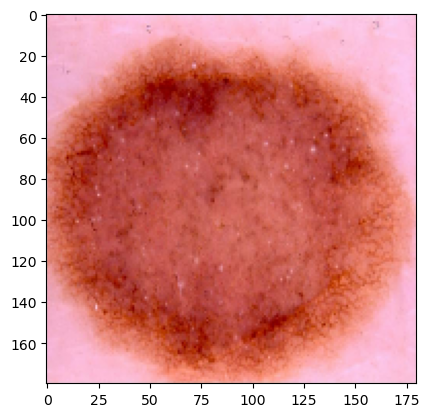

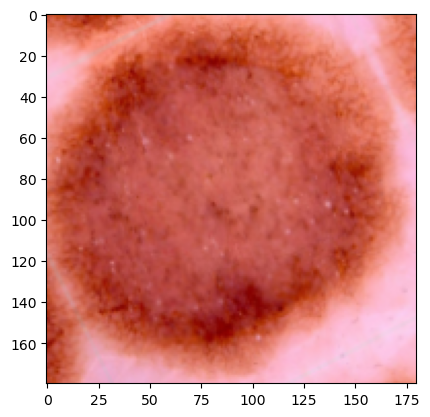

In [22]:
# looking at another image .
for images, t in train_ds.take(1):
    augmented_images = data_augment(images)
    print("image before augmentation")
    plt.imshow(images[2].numpy().astype("uint8"))
    plt.figure()
    print("image after augmentation")
    plt.imshow(augmented_images[2].numpy().astype("uint8"))


### Create the model, compile and train it.


##### We use a dropout layer since the first model was overfitting.
##### Images have been scaled to pixel values in [0,1]

In [23]:
model = Sequential([data_augment,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names),activation='softmax')
])


### Compiling the model

In [24]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 90, 90, 16)       64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 90, 90, 16)       

### Training the model

In [26]:

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 25s 429ms/step - loss: 3.4897 - accuracy: 0.3482 - val_loss: 2.2457 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 24s 422ms/step - loss: 1.5432 - accuracy: 0.4766 - val_loss: 2.2840 - val_accuracy: 0.1499
Epoch 3/20
56/56 [==============================] - 23s 416ms/step - loss: 1.5067 - accuracy: 0.4771 - val_loss: 2.3862 - val_accuracy: 0.1544
Epoch 4/20
56/56 [==============================] - 25s 443ms/step - loss: 1.3927 - accuracy: 0.5073 - val_loss: 2.5510 - val_accuracy: 0.2125
Epoch 5/20
56/56 [==============================] - 25s 446ms/step - loss: 1.3679 - accuracy: 0.5151 - val_loss: 2.2919 - val_accuracy: 0.1700
Epoch 6/20
56/56 [==============================] - 25s 449ms/step - loss: 1.3562 - accuracy: 0.5095 - val_loss: 2.1326 - val_accuracy: 0.2483
Epoch 7/20
56/56 [==============================] - 25s 454ms/step - loss: 1.3248 - accuracy: 0.5290 - val_loss: 2.7651 - val_accuracy: 0.1969

### Visualizing the results

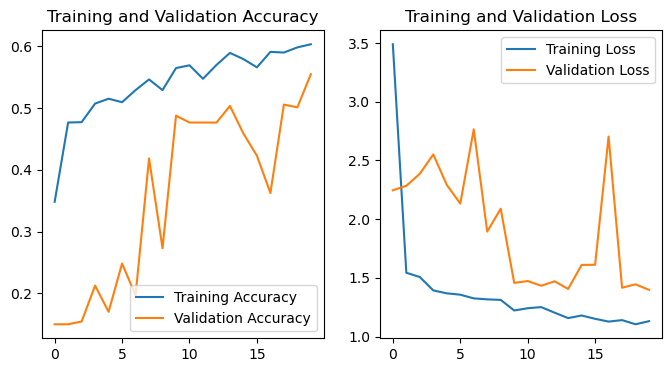

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Inference:

 - We can clearly see that the image augmentation has helped to solve the overfitting problem.
 - The difference between the training accuracy and validation accuracy has been reduced.
 - But the accuracy of the model has decreased i.e. the model is underfitting, which can be improved by increasing the complexity of the model.

#### Finding the distribution of classes in the training dataset.
####  Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Checking the distribution of classes in the data.

pigmented benign keratosis    370
melanoma                      352
basal cell carcinoma          309
nevus                         277
squamous cell carcinoma       142
vascular lesion               115
actinic keratosis              92
dermatofibroma                 77
seborrheic keratosis           58
Name: Label, dtype: int64


Text(0, 0.5, 'Counts')

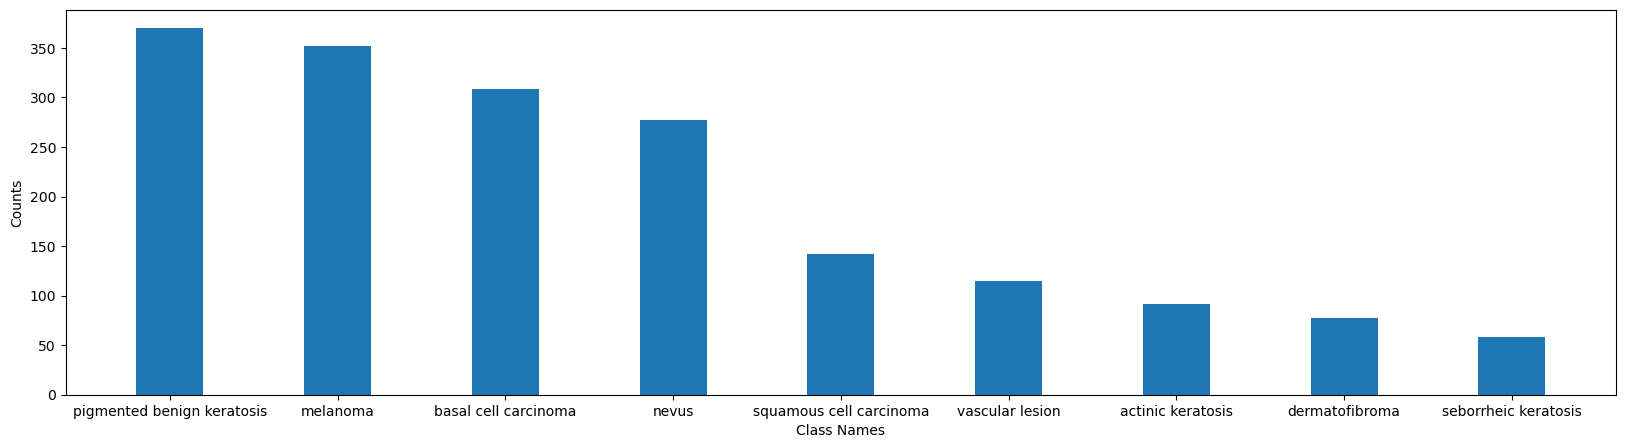

In [28]:
labels = []
for x, y in train_ds:
    labels.append(y.numpy())
labels = np.concatenate(labels, axis = 0)
train_df = pd.DataFrame(labels)
train_df.columns = ['Index']
train_df['Label'] = train_df['Index'].apply(lambda x: class_names[x])
#print(train_df.head())
freq = train_df['Label'].value_counts()
print(freq)
fig = plt.figure(figsize = (20, 5))

plt.bar(freq.index, freq.values, width = 0.4)

plt.xlabel("Class Names")
plt.ylabel("Counts")



#### - seborrheic keratosis class has the least number of samples.
#### - There are total 1792 images.
#### - Classes which dominate the data in terms proportionate number of samples are-pigmented benign keratosis, melanoma, basal cell carcinoma, nevus. These classes have more than 1792/9 images.


#### Rectifying the class imbalance using a python package known as `Augmentor`
#### This adds more samples across all classes so that none of the classes have very few samples.

In [29]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


#### We are adding 500 samples per class to make sure that none of the classes are sparse

In [30]:
path_to_training_dataset=str(data_dir_train)+'/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to C:\Users\bhuta\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x18A019AFAF0>: 100%|█| 500/500 [00:04<00:


Initialised with 376 image(s) found.
Output directory set to C:\Users\bhuta\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x18A015EE160>: 100%|█| 500/500 [00:04<00:00, 122.56 Samples


Initialised with 95 image(s) found.
Output directory set to C:\Users\bhuta\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x18A017C4190>: 100%|█| 500/500 [00:04<00:00, 115.25 Samples


Initialised with 438 image(s) found.
Output directory set to C:\Users\bhuta\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x18A001B37C0>: 100%|█| 500/500 [00:23<00:00, 21.58 Samples


Initialised with 357 image(s) found.
Output directory set to C:\Users\bhuta\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x18A000BB040>: 100%|█| 500/500 [00:17<00:00, 28.79 Samples


Initialised with 462 image(s) found.
Output directory set to C:\Users\bhuta\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x18A01950EE0>: 100%|█| 500/500 [00:03<00:00, 133.70 Samples


Initialised with 77 image(s) found.
Output directory set to C:\Users\bhuta\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x18A002FBC40>: 100%|█| 500/500 [00:10<00:00, 45.98 Samples


Initialised with 181 image(s) found.
Output directory set to C:\Users\bhuta\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x18A003F7F70>: 100%|█| 500/500 [00:03<00:00, 133.11 Samples


Initialised with 139 image(s) found.
Output directory set to C:\Users\bhuta\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x18A015B02B0>: 100%|█| 500/500 [00:04<00:00, 118.45 Samples


##### total count of augmented images.

In [31]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [32]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['C:\\Users\\bhuta\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_7c53f2f6-9af5-4002-9127-1a46779917e0.jpg',
 'C:\\Users\\bhuta\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_b0012dcb-1b76-482c-bc37-28b1dba1bd24.jpg',
 'C:\\Users\\bhuta\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_d2ef8f94-2a31-4315-be5f-f559a6c1f875.jpg',
 'C:\\Users\\bhuta\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_d47a12db-6cbd-46c3-bedf-f45aaba78ea2.jpg',
 'C:\\Users\\bhuta\\Downloads\\CNN_assignment\\Skin cancer ISIC The Internat

In [33]:
len(path_list)

4500

In [34]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [35]:
len(lesion_list_new)

4500

In [36]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [37]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
# Checking number of images added.
df2['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

##### We can see that we have added 500 images to all the classes to maintain some class balance.

#### **Todo**: Train the model on the data created using Augmentor

In [38]:
batch_size = 32
img_height = 180
img_width = 180

####  Create a training dataset

In [39]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### Create a validation dataset

In [40]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### Model Building

In [41]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
#print(AUTOTUNE)
train_ds.prefetch(buffer_size=AUTOTUNE)
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### Images have been normmalized by adding Rescaling layer which converts pixel values in range [0.1]

In [42]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
   layers.Dense(len(class_names),activation='softmax')
])

#### Compiling the model

In [43]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#### Model training

In [44]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
43/43 [==============================] - 26s 529ms/step - loss: 7.6473 - accuracy: 0.2123 - val_loss: 2.1862 - val_accuracy: 0.1924
Epoch 2/30
43/43 [==============================] - 22s 505ms/step - loss: 1.8060 - accuracy: 0.3653 - val_loss: 2.1945 - val_accuracy: 0.0895
Epoch 3/30
43/43 [==============================] - 23s 541ms/step - loss: 1.4720 - accuracy: 0.4692 - val_loss: 2.1728 - val_accuracy: 0.2438
Epoch 4/30
43/43 [==============================] - 30s 701ms/step - loss: 1.3055 - accuracy: 0.5382 - val_loss: 2.2310 - val_accuracy: 0.0537
Epoch 5/30
43/43 [==============================] - 22s 519ms/step - loss: 1.1674 - accuracy: 0.5939 - val_loss: 2.1468 - val_accuracy: 0.1767
Epoch 6/30
43/43 [==============================] - 20s 472ms/step - loss: 1.0555 - accuracy: 0.6466 - val_loss: 2.1053 - val_accuracy: 0.1611
Epoch 7/30
43/43 [==============================] - 19s 431ms/step - loss: 0.9162 - accuracy: 0.6815 - val_loss: 2.0558 - val_accuracy: 0.2148

####   Visualizing the model results

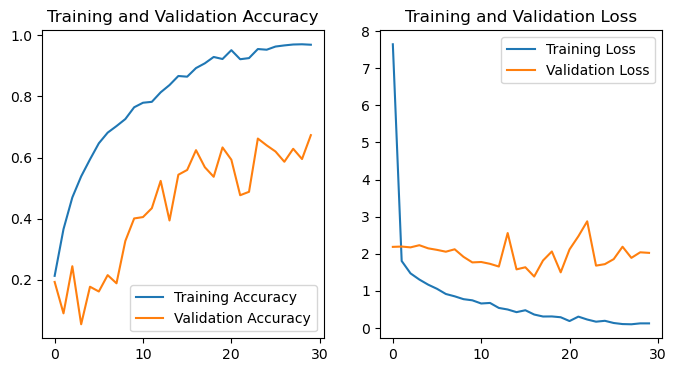

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Inference:



 - We can see that the model has improved and the class rebalance has helped to some extent.
 - There is still some overfitting 
 - We can add more number of images through data augmentation which can improve the results.
 - More number of images will give a larger training set and add variations to it , which can give even better results.
